#Álgebra Lineal Computacional
##Trabajo Práctico Nº1

Hecho por: Flor Fontana y Valentina Durán


In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

###Ejercicio 1
Hacemos un programa que aplique k iteraciones del método de la potencia con un vector aleatorio inicial.

In [3]:


def mayor_aval(A,k):
  a = []
  v = np.random.rand(len(A))
  for i in range(k):
    Av = A@v
    v = Av / np.linalg.norm(Av,2)        #normalizamos el vector en cada iteración
    aval = v.T.dot(A).dot(v)/v.T.dot(v)
    a.append(aval)
    
  return(a)

#Hagamos la prueba

A = np.array([[1,2,3],[3,4,5],[1,0,1]])

print("Con el metodo de la potencia el autovalor tiende a: ", mayor_aval(A,1000)[999])

print("Calculando directo el autovalor nos da: ", np.linalg.eigvals(A)[0])




Con el metodo de la potencia el autovalor tiende a:  5.884483701939333
Calculando directo el autovalor nos da:  5.884483701939331


###Ejercicio 2 
a) Tomamos una matriz de 100×100 de coordenadas aleatorias y utilizamos el programa para realizar 100 iteraciones del método.


In [4]:

A = np.random.rand(100,100)

res2 = mayor_aval(A,100)
print(res2)

[49.79965197094628, 49.8767062134718, 49.87610448026678, 49.8761008337956, 49.876102511495866, 49.876102518062744, 49.87610252590238, 49.876102526238654, 49.87610252623363, 49.87610252623298, 49.87610252623298, 49.876102526232984, 49.87610252623298, 49.876102526232984, 49.876102526232984, 49.876102526232984, 49.876102526232984, 49.87610252623299, 49.876102526232984, 49.87610252623298, 49.87610252623298, 49.876102526232984, 49.876102526232984, 49.87610252623299, 49.87610252623299, 49.876102526232984, 49.87610252623298, 49.876102526232984, 49.87610252623298, 49.87610252623298, 49.876102526232984, 49.876102526232984, 49.87610252623299, 49.87610252623299, 49.876102526232984, 49.87610252623298, 49.876102526232984, 49.87610252623298, 49.87610252623298, 49.876102526232984, 49.876102526232984, 49.87610252623299, 49.87610252623299, 49.876102526232984, 49.87610252623298, 49.876102526232984, 49.87610252623298, 49.87610252623298, 49.876102526232984, 49.876102526232984, 49.87610252623299, 49.876102

###b)

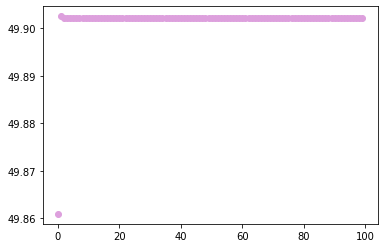

In [ ]:
plt.plot(res2,"o", color = 'plum')

Consideramos que el método coverge rápidamente. Esto lo podemos observar en el gráfico porque en las primeras iteraciones ya tiende al valor del autovalor.

###Ejercicio 3
a)

In [ ]:
#Definimos C una matriz de 100x100 aleatoria y A como la matriz simétrica definida más adelante
C = np.random.rand(100,100)
A = (1/2)*(C + C.T) # Es una forma de asegurarnos una matriz con todos sus autovalores reales y positivos


#Definimos B = A + 500I 
B = A + 500*np.identity(100)

#Aplicamos metodo de la potencia 100 veces
res3 = mayor_aval(B,100)
print("Con el metodo de la potencia el autovalor tiende a: ", res3[99])


Con el metodo de la potencia el autovalor tiende a:  550.1544014385003


b)

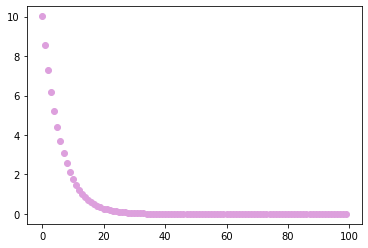

In [ ]:
#Graficamos el error, donde el vector de errores está dado por el vector ei = |λmax − ai|.
lambda_max = max(np.linalg.eigvals(B))
e = abs(res3 - lambda_max)
plt.plot(e, "o", color = 'plum')

El gráfico parecería ser una exponencial negativa.

###c)

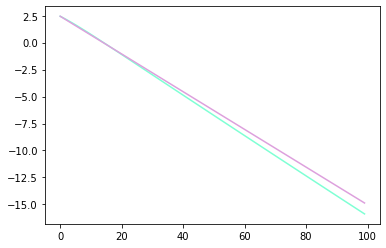

In [ ]:
#Graficamos log(ei) 

log_e = np.log(e)
plt.plot(log_e, color = 'aquamarine')
lambda_2 = sorted(np.linalg.eigvals(B))[-2] #Esto lo podemos hacer ya que sabemos que los avales son reales y positivos

#En el mismo gráfico representamos la función y(x) = 2.log( λ2/λ1 )x + log(e0).
def f(x):
  return 2*np.log(lambda_2/lambda_max)*x + np.log(e[0])

x = range(0, 100)
plt.plot(x, [f(i) for i in x], color = 'plum')

La recta celeste corresponde a los errores del método de la potencia y la recta rosa es la recta y(x) = 2.log( λ2/λ1 )x + log(e0). 

Podemos notar como se puede aproximar los errores del método por esta recta


###Ejercicio 4
Repetimos el experimento para distintos valores de K.

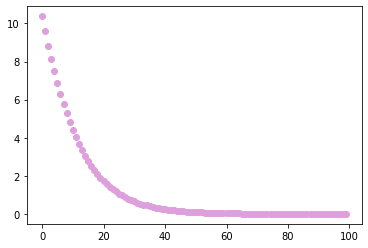

In [ ]:
#Definimos B, para K = 1000
B_1000 = A + 1000*np.identity(100)

#Aplicamos metodo de la potencia 100 veces
res_1000 = mayor_aval(B_1000,100)


#Graficamos el error
lambda_max1 = max(np.linalg.eigvals(B_1000))
e1 = abs(res_1000 - lambda_max1)
plt.plot(e1, "o", color = 'plum')

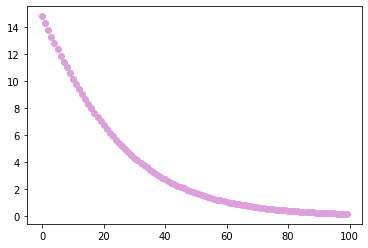

In [ ]:
#Definimos B, para K = 2000
B_2000 = A + 2000*np.identity(100)

#Aplicamos metodo de la potencia 100 veces
res_2000 = mayor_aval(B_2000,100)

#Graficamos el error
lambda_max2 = max(np.linalg.eigvals(B_2000))
e2 = abs(res_2000 - lambda_max2)
plt.plot(e2,"o", color = 'plum')

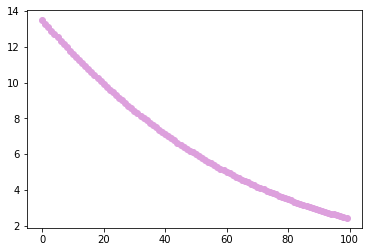

In [ ]:
#Definimos B, para K = 5000
B_5000 = A + 5000*np.identity(100)

#Aplicamos metodo de la potencia 100 veces
res_5000 = mayor_aval(B_5000,100)

#Graficamos el error
lambda_max3 = max(np.linalg.eigvals(B_5000))
e3 = abs(res_5000 - lambda_max3)
plt.plot(e3, "o", color = 'plum')

La velocidad de convergencia disminuye ya que cada vez estamos sumando más veces la matriz identidad. Por lo que se va pareciendo a esta matriz, que tiene todos sus autovalores iguales, por lo que en el gráfico de errores se ve cada vez una pendiente más nula.  